In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>''')

<a name="Top"></a>

In [6]:
from IPython.display import HTML
HTML('''
<style>
    .yourDiv {position: fixed;top: 100px; right: 0px; 
              background: white;
              height: 100%;
              width: 175px; 
              padding: 10px; 
              z-index: 10000}
</style>
<script>
function showthis(url) {
	window.open(url, "pres", 
                "toolbar=yes,scrollbars=yes,resizable=yes,top=10,left=400,width=500,height=500");
	return(false);
}
</script>

<div class=yourDiv>
    <h4>MENU</h4><br>
    <a href=#Data>1. Data</a><br>
    <a href=#SpatialCoverage>2. Spatial Coverage</a><br>
    <a href=#TemporalCoverage>3. Temporal Coverage</a><br>
    <a href=#ClassOverlaps>4. Farm size class overlaps</a><br>
    <a href=#YieldLookUpTable>5. Yield look-up table</a><br><br>

    <a href=#Top>Top</a><br>
    <a href="javascript:code_toggle()">Toggle Code On/Off</a><br>
    <a href=#LeftOff>Left Off Here</a><br>
    <a href='https://vinnyricciardi.github.io/farmsize_site/'>Site Index</a><br>
</div>
''')

<a name="Top"></a>
<center><h1>Data Coverage Overview</h1>


<a name="Data"></a>
<h2>Data</h2><br>


In [3]:
# Import dependencies
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.pyplot import cm 
import matplotlib as mpl
import numpy as np
import re
import geopy
import mpld3
import plotly.plotly as py
import cmocean

pd.set_option('display.max_columns', 500)
%matplotlib inline

In [4]:
# Set all plotting params:
title_sz = 20
x_lab_tick_sz = 18
y_lab_tick_sz = 18
x_lab_label_sz = 18
y_lab_label_sz = 18
lengend_sz = 16

In [6]:
PATH = '/Users/Vinny_Ricciardi/Documents/Data_Library_Big/Survey/Global/Farm_Size/Data/FarmSize_data_fullyProcessed.csv'
df = pd.read_csv(PATH, low_memory=False)

<a name="SpatialCoverage"></a>
<h2>Spatial Coverage</h2>

In [7]:
df['NAME_0'].replace(['United States of America'], ['United States'], inplace=True)
df['NAME_0'].replace(['Bosnia and Herzegovina'], ['Bosnia and Herz.'], inplace=True)
df['NAME_0'].replace(['United Republic of Tanzania'], ['Tanzania'], inplace=True)
df['NAME_0'].replace(['Russian Federation'], ['Russia'], inplace=True)
df['NAME_0'].replace(['Czech Republic'], ['Czech Rep.'], inplace=True)
df['NAME_0'].replace(['Czech Republic'], ['Czech Rep.'], inplace=True)
df['NAME_0'].replace(['Czech Republic'], ['Czech Rep.'], inplace=True)


To do:
- What percentage of global production does our sample represent?

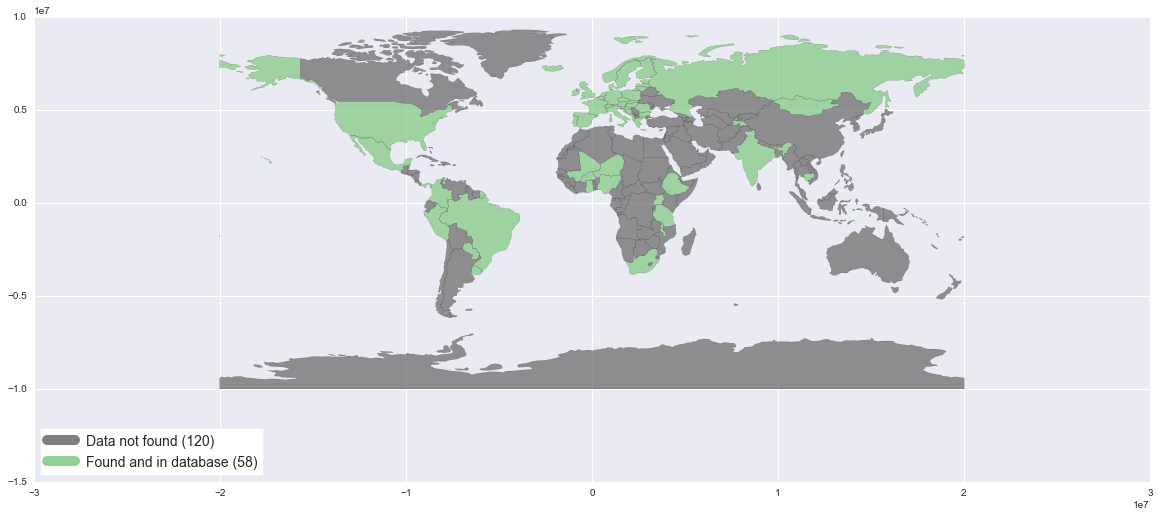

In [8]:
pivoted = pd.pivot_table(df, 
                         index='NAME_0', 
                         values='Crop', 
                         aggfunc=lambda x: len(x.unique()))
pivoted = pivoted.reset_index()
pivoted = pivoted.sort_values('Crop', ascending=False)
pivoted['Data_Available'] = pivoted['Crop'].astype(int)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.to_crs(epsg=3786)

world = pd.merge(world, pivoted, 
                 how='outer', 
                 left_on='name', 
                 right_on='NAME_0')

world['Orig_crop'] = world['Crop'].fillna(0)
world['coverage'] = np.where(world['Crop'] > 0, 
                             'Found and downloaded', 
                             np.where(world['Crop'] == -1, 
                                      'Found not downloaded', 
                                      'No data found'))

warnings.filterwarnings('ignore')

x = len(pivoted.NAME_0.unique())

try:
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_aspect('equal')
    world.plot(column='coverage', cmap='Accent', ax=ax, alpha=0.7, linewidth=0.1)  #cmocean.cm.deep
except:
    pass

ndf, fad = world.coverage.value_counts()
cmap_ = cmocean.tools.get_dict(cmocean.cm.deep, N=4)

p1 = mpl.lines.Line2D([], [], 
                             color=[x / 255. for x in [128, 128, 130]],
                             linewidth=10, 
                             label='Data not found ({})'.format(ndf))
p2 = mpl.lines.Line2D([], [], 
                             color=[x / 255. for x in [148, 207, 150]], 
                             linewidth=10, 
                             label='Found and in database ({})'.format(fad))

handles = [p1, p2]
labels = [h.get_label() for h in handles] 

legend = ax.legend(handles=handles, labels=labels, frameon=True, 
                   fontsize=14, loc='lower left')

legend.get_frame().set_facecolor('#ffffff')

plt.show()

<a name="TemporalCoverage"></a>
<h2>Temporal Coverage</h2>

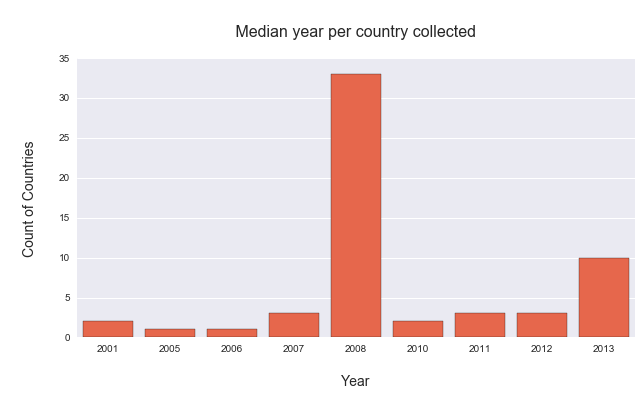

In [9]:
df = df.sort_values('NAME_0')
grouped = df.groupby('NAME_0').mean()
grouped['year'] = grouped['year'].astype(int)
grouped = grouped.sort('year')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.countplot(x=grouped.year, color='#FF5733', ax=ax)
ax.set_title('\n Median year per country collected \n', fontsize=title_sz-4)
ax.set_xlabel('\nYear\n', fontsize=y_lab_tick_sz-4)
ax.set_ylabel('\nCount of Countries\n', fontsize=y_lab_tick_sz-4)
mpl.rcParams['xtick.labelsize'] = x_lab_tick_sz-8
mpl.rcParams['ytick.labelsize'] = y_lab_tick_sz-8
plt.show()

<a name="LeftOff"></a>
<h3>Left Off</h3>

To Do:
- Need to put into the global context